In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scienceplots
import os

In [25]:
plt.style.use(['science', 'notebook', 'grid'])

In [26]:
# plt.style.available

In [27]:
near_fault = ['san_fernando_nf', 'tabas_nf', 'landers_nf', 'northridge_1050', 'northridge_1051', 'kocaeli_geb_nf', 'kocaeli_iz_nf', 'loma_prieta_nf', 'cape_mendocino', 'l_aquila']
far_fault = ['coyote_lake', 'nw_calif', 'santa_barbara', 'borrego', 'coalinga', 'san_fernando', 'trinidad', 'kocaeli', 'tabas', 'duzce'] 
earthquakes = near_fault + far_fault

In [28]:
fig_size = (18, 6)

Plotting functions

In [29]:
def plot_one(ax, x, y, xlabel, ylabel, title, marker, legend=None):
    h1, = ax.plot(x, y, marker)
    if legend:
        ax.legend([h1], [legend])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

In [30]:
def plot_two(ax, x, y, xlabel, ylabel, title, markers, legends):
    y1, y2 = y
    h1, = ax.plot(x, y1, markers[0])
    h2, = ax.plot(x, y2, markers[1])
    ax.legend([h1, h2], legends)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

Plot PGA vs IDR curve for all earthquakes

In [31]:
# idrs = {}
# for eq in earthquakes:
#     idr = []
#     for scale in np.arange(0.1, 1.1, 0.1).round(1):
#         path = os.path.join(eq, str(scale), 'peaks.csv')
#         df = pd.read_csv(path)
#         idr.append(df['idr'].values[0])
#     idrs[eq] = idr
# idr_df = pd.DataFrame(idrs)

In [32]:
accs = {}
for eq in earthquakes:
    acc = []
    for scale in np.arange(0.1, 1.1, 0.1).round(1):
        path = os.path.join(eq, str(scale), 'peaks.csv')
        df = pd.read_csv(path)
        acc.append(df['acc'].values[0])
    accs[eq] = acc
acc_df = pd.DataFrame(accs)

In [33]:
acc_df

,san_fernando_nf,tabas_nf,landers_nf,northridge_1050,northridge_1051,kocaeli_geb_nf,kocaeli_iz_nf,loma_prieta_nf,cape_mendocino,l_aquila,coyote_lake,nw_calif,santa_barbara,borrego,coalinga,san_fernando,trinidad,kocaeli,tabas,duzce
0,2.045461,2.258751,2.844206,2.089730,1.983803,2.111102,1.802643,1.305742,1.184894,2.760016,1.408895,1.524248,1.411262,2.118967,1.635252,2.695420,1.866367,2.199905,1.810220,1.883031
1,2.589874,4.356572,3.568440,2.478322,3.592392,3.361816,3.447549,2.929428,3.190586,3.310715,2.464136,2.111986,2.671800,4.045950,2.658652,3.318246,3.085244,4.286836,2.929670,3.424224
2,3.215662,5.359657,4.685668,3.321776,3.332130,3.536729,5.354799,4.486734,4.549993,4.658471,2.577598,3.501968,2.369140,4.918989,3.662801,4.770502,4.216179,4.054514,3.718423,4.054174
3,4.782706,5.604868,5.021648,3.199593,5.175849,4.191705,6.286766,4.143941,3.389128,4.011456,3.207058,5.665594,5.390798,4.364572,5.296825,6.617589,4.942717,4.141466,4.067024,5.018919
4,4.286777,6.059728,5.556891,3.470472,5.508424,4.908311,6.809769,3.886507,3.675960,4.047855,4.263135,6.033457,3.892401,4.524368,5.865687,6.045445,5.337947,5.539346,5.056133,5.573393
5,5.358467,6.797577,5.939115,3.304871,6.744360,5.213706,7.893375,3.513209,4.012672,4.759968,5.603697,5.318992,2.501410,5.019346,5.273838,7.302504,4.879127,6.021183,5.270196,6.507316
6,6.055450,6.665766,5.879067,3.354600,7.256590,5.928139,7.563359,3.468988,4.791739,7.113641,6.086387,5.471392,5.817234,6.869462,7.275656,7.737302,4.610579,6.444706,5.212872,7.866891
7,6.350872,6.891399,6.051343,3.606594,7.109985,6.447893,9.038021,4.714516,4.827233,6.353299,6.797874,5.347995,3.838489,7.055494,8.214885,5.920024,5.180093,6.559447,5.975102,8.699071
8,6.589298,6.224884,6.362888,3.816106,7.136525,6.196878,10.291351,5.892699,5.502094,6.765498,6.624753,5.241266,3.468430,7.078966,7.441585,4.751621,5.800220,5.513591,6.835046,8.667665
9,6.575211,6.731153,7.195088,4.073767,7.355046,5.868180,10.580341,6.860863,5.896662,6.326907,5.809120,5.095791,3.563853,6.972650,5.437699,4.990074,5.532001,6.310191,7.782815,7.715273


In [34]:
df

,idr,acc,psd
0,0.085152,7.715273,0.304733


In [35]:
df = acc_df.filter(items = near_fault, axis = 1)
# narr = df.to_numpy()

In [36]:
def get_peaks(eq_type, var, condition = 'normal'):
    """
    eq_type: near_fault or far_fault list
    var: 'acc' or 'psd' string
    condition: 'normal' or 'no_ssi' or 'fixed_base' or 'no_vert' string
    """
    variables = {}
    file = 'peaks'
    if condition != 'normal':
        file = file + '_' + condition
    filename = file + '.csv'
    for eq in earthquakes:
        if eq in eq_type:
            varble = []
            for scale in np.arange(0.1, 1.1, 0.1).round(1):
                path = os.path.join(eq, str(scale), filename)
                df = pd.read_csv(path)
                varble.append(df[var].values[0])
            variables[eq] = varble
    var_df = pd.DataFrame(variables)
    return var_df

In [37]:
a = get_peaks(far_fault, 'psd')

In [38]:
# a

In [39]:
# for col, a in zip(a.columns, a.values.T):
#     print(col)
#     print(a)

In [40]:
factors = factors = np.arange(0.1,1.1,0.1).round(1)

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

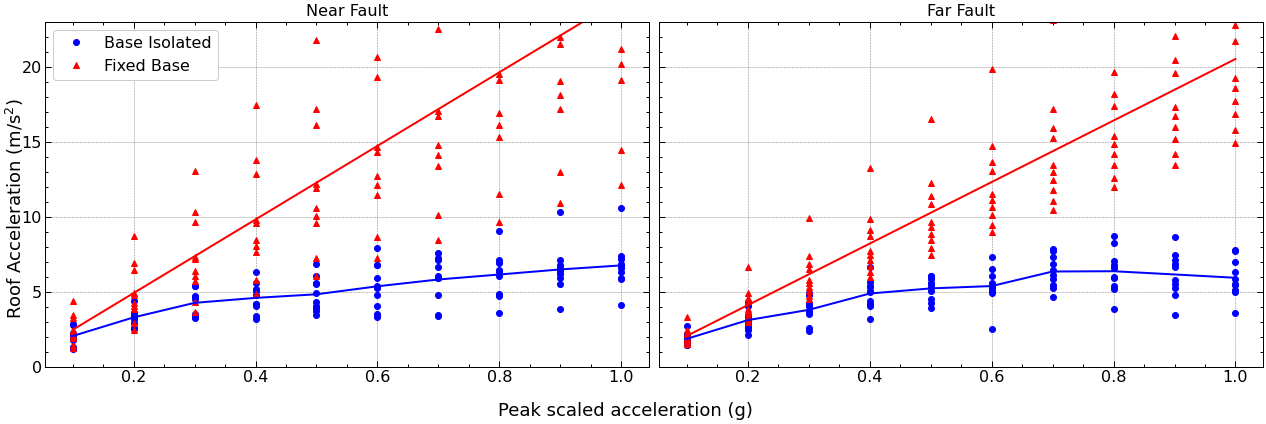

In [41]:
var = 'acc'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
fix_acc = get_peaks(near_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Fixed Base')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,23])

# Far Fault

acc = get_peaks(far_fault, var)
fix_acc = get_peaks(far_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Fixed Base')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,23])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'PSD (m)')

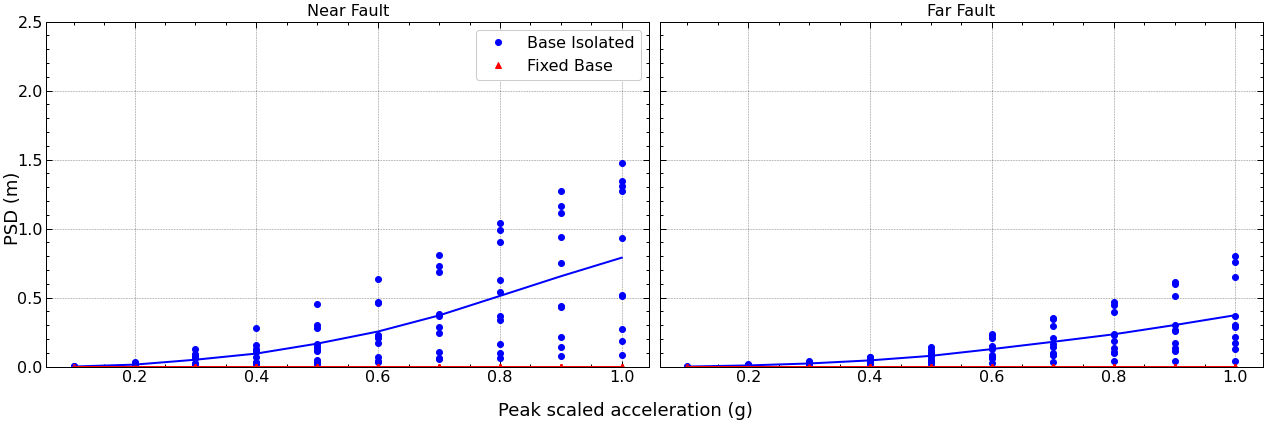

In [42]:
var = 'psd'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
fix_acc = get_peaks(near_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Fixed Base')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,2.5])

# Far Fault

acc = get_peaks(far_fault, var)
fix_acc = get_peaks(far_fault, var, 'fixed_base')
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'Base Isolated')
for arr in fix_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Fixed Base')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(fix_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,2.5])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('PSD (m)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

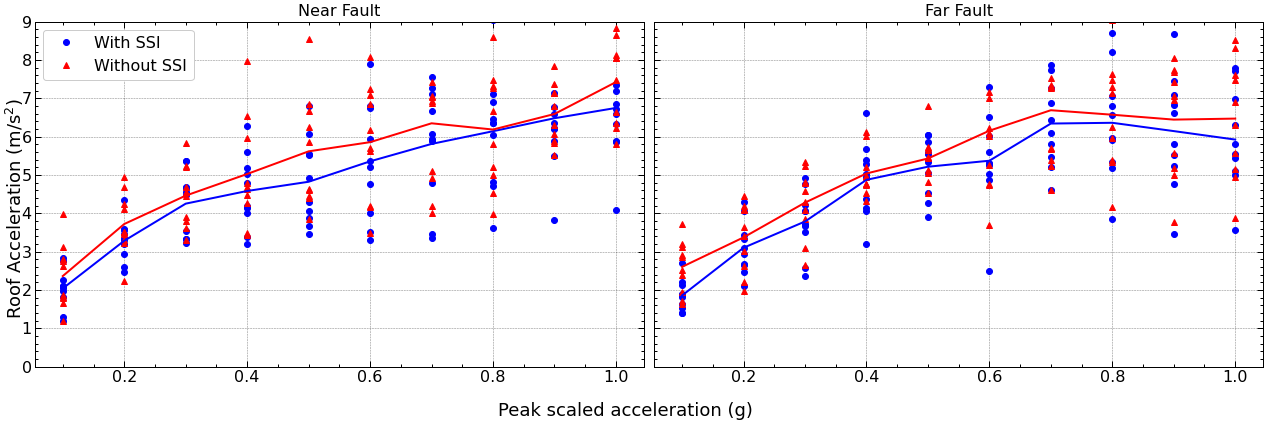

In [43]:
var = 'acc'
influence = 'no_ssi'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without SSI')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,9])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,9])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'PSD (m)')

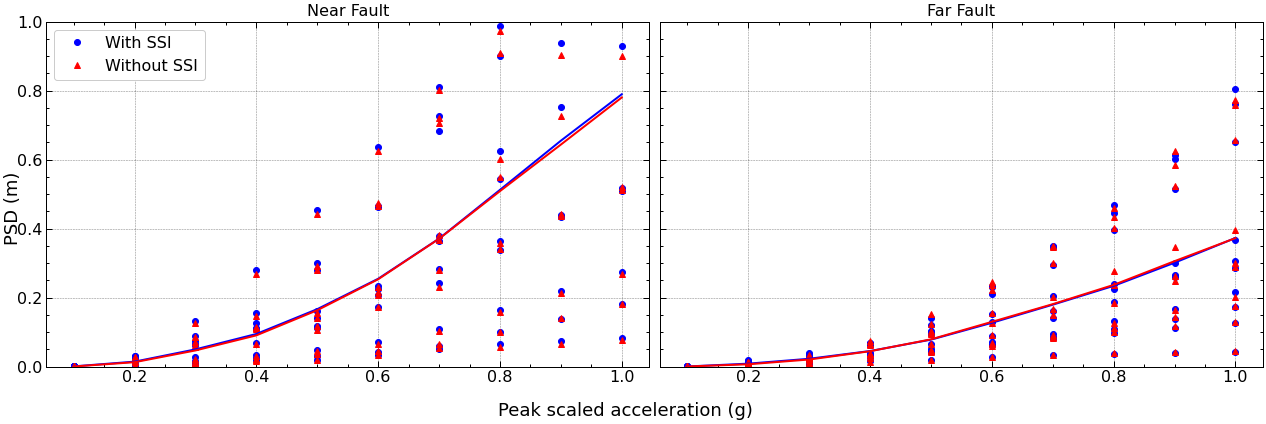

In [45]:
var = 'psd'
influence = 'no_ssi'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without SSI')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,1.0])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,1.0])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('PSD (m)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'Roof Acceleration (m/s$^2$)')

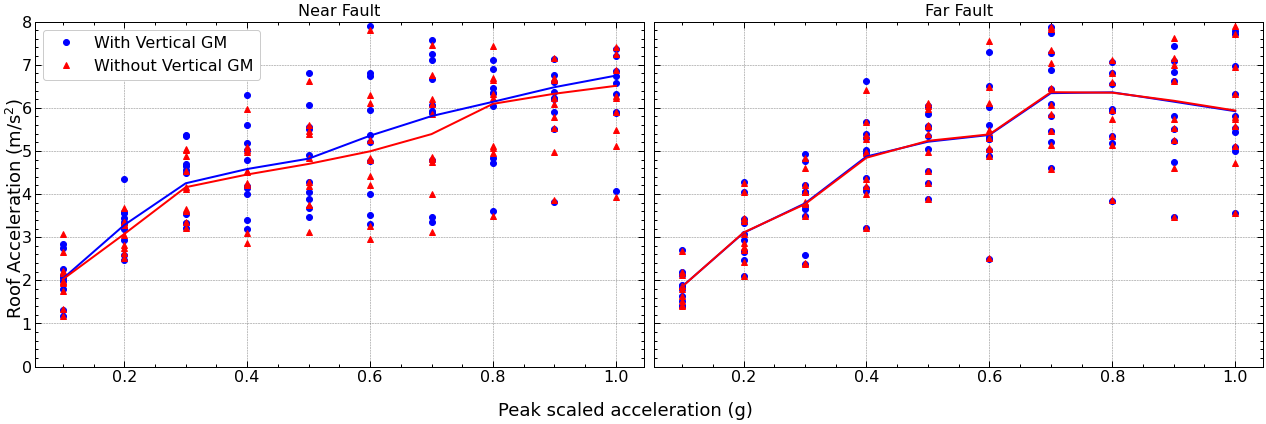

In [46]:
var = 'acc'
influence = 'no_vert'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With Vertical GM')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without Vertical GM')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,8])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,8])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Text(0.02, 0.5, 'PSD (m)')

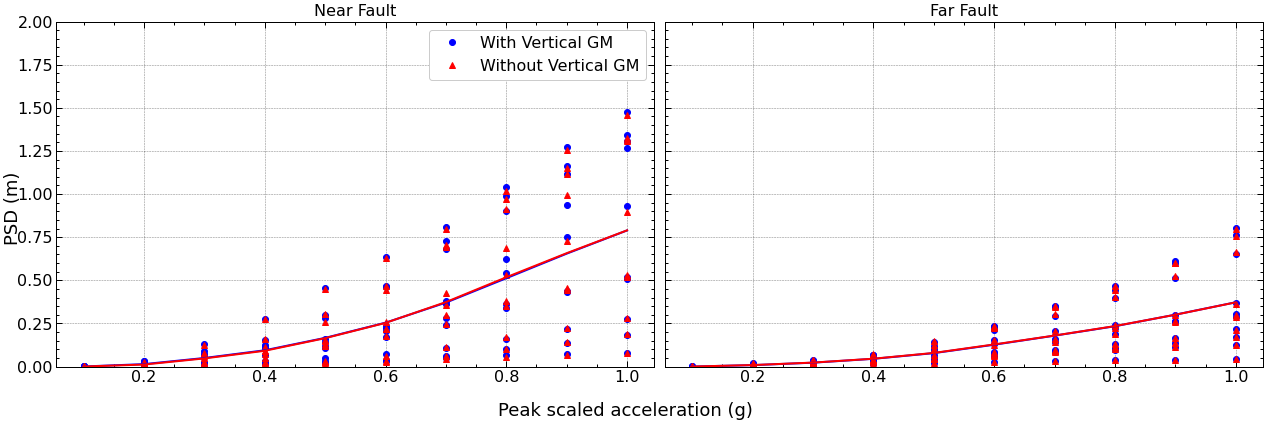

In [47]:
var = 'psd'
influence = 'no_vert'

fig = plt.figure(figsize = fig_size, tight_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc = get_peaks(near_fault, var)
ssi_acc = get_peaks(near_fault, var, influence)
for arr in acc.values.T:
    ax1.plot(factors, arr, 'bo', label = 'With Vertical GM')
for arr in ssi_acc.values.T:
    ax1.plot(factors, arr, 'r^', label = 'Without Vertical GM')
ax1.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax1.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[0], handles[-3]], [labels[0], labels[-3]])
ax1.set_ylim([0,2])

# Far Fault

acc = get_peaks(far_fault, var)
ssi_acc = get_peaks(far_fault, var, influence)
for arr in acc.values.T:
    ax2.plot(factors, arr, 'bo', label = 'With SSI')
for arr in ssi_acc.values.T:
    ax2.plot(factors, arr, 'r^', label = 'Without SSI')
ax2.plot(factors, pd.DataFrame(acc).mean(axis=1), 'b-', label = 'Base Isolated')
ax2.plot(factors, pd.DataFrame(ssi_acc).mean(axis=1), 'r-', label = 'Fixed Base')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([0,2])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('PSD (m)', fontsize = 18)
# fig.suptitle('Effect of PFBI on roof acceleration across PGAs', fontsize = 18)
# fig.savefig(os.path.join(dest, f'fix_acc.{fig_format}'))
# tikzplotlib_fix_ncols(fig)
# tikzplotlib.save('test.pgf')
# plt.clf()
# plt.close()

Shear wave velocity plot

In [67]:
velocities = np.arange(100, 501, 50).round(1)


In [68]:
def get_peaks_vs(eq_type, var):
    """
    eq_type: near_fault or far_fault list
    var: 'acc' or 'psd' or 'idr' string
    condition: 'normal' or 'no_ssi' or 'fixed_base' or 'no_vert' string
    """
    variables = {}
    filename = 'peaks.csv'
    for eq in earthquakes:
        if eq in eq_type:
            varble = []
            for vels in velocities:
                path = os.path.join(eq, 'shear_wave_velocities', str(vels), filename)
                df = pd.read_csv(path)
                varble.append(df[var].values[0])
            variables[eq] = varble
    var_df = pd.DataFrame(variables)
    return var_df

Text(0.5, 0.98, 'Effect of soil shear wave velocity on IDR at 0.6g PGA')

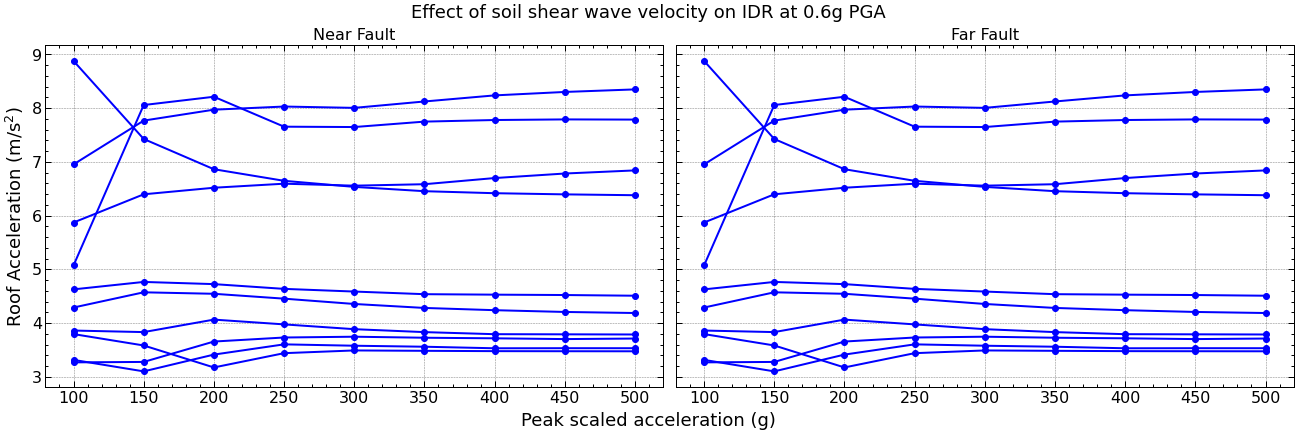

In [71]:
var = 'acc'

fig = plt.figure(figsize = fig_size, constrained_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc_nf = get_peaks_vs(near_fault, var)
for k, arr in acc_nf.items():
    ax1.plot(velocities, arr, 'bo-', label = 'With SSI')
    # ax1.plot(factors, ssi_drift_nf[k], 'ro-', label = 'Without SSI')
# handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
# ax1.legend([handles[0], handles[-1]], [labels[0], labels[-1]])
#ax1.set_ylim([0.0265,0.047])
acc_ff = get_peaks_vs(near_fault, var)
for k, arr in acc_ff.items():
    ax2.plot(velocities, arr, 'bo-', label = 'With SSI')
    # ax2.plot(factors, ssi_drift_ff[k], 'ro-', label = 'Without SSI')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
#ax2.set_ylim([0.0265,0.047])
ax2.label_outer()
fig.supxlabel('Peak scaled acceleration (g)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
fig.suptitle('Effect of soil shear wave velocity on IDR at 0.6g PGA', fontsize = 18)
#fig.savefig(os.path.join(dest, f'vs_idr.{fig_format}'))
# plt.clf()
# plt.close()

In [ ]:
var = "acc"

fig = plt.figure(figsize = fig_size, constrained_layout = True)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharex = ax1)
acc_nf = get_peaks_vs(near_fault, var)
acc_no_ssi_nf = 
for k, arr in acc_nf.items():
    ax1.plot(velocities, arr, 'bo', label = 'With SSI', alpha=0.2)
    # ax1.plot(factors, ssi_drift_nf[k], 'ro-', label = 'Without SSI')
ax1.plot(velocities, pd.DataFrame(acc_nf).mean(axis=1), 'bo-', label = 'With SSI')
xline = np.linspace(50,450,1000)
ssi_acc_nf = get_peaks(near_fault, var, 'no_ssi')
ax1.plot(xline, pd.DataFrame(ssi_acc_nf).mean(axis=1)[soil_pga-1]*np.ones(1000),  color = 'red', label = 'Without SSI')
# ax1.plot(factors, pd.DataFrame(ssi_acc_nf).mean(axis=1), 'ro-', label = 'Without SSI')
handles, labels = ax1.get_legend_handles_labels()
# ax1.set_ylabel('IDR (%)')
# ax1.set_xlabel('Peak scaled acceleration (g)')
ax1.set_title('Near Fault')
ax1.legend([handles[-1]], [labels[-1]])
ax1.set_ylim([3.3,6.3])
ax1.set_xlim([80,420])
for k, arr in vs_acc_ff.items():
    ax2.plot(velocities, arr, 'bo', label = 'With SSI', alpha = 0.2)
    # ax2.plot(factors, ssi_drift_ff[k], 'ro-', label = 'Without SSI')
ax2.plot(velocities, pd.DataFrame(vs_acc_ff).mean(axis=1), 'bo-', label = 'With SSI')
ax2.plot(xline, pd.DataFrame(ssi_acc_ff).mean(axis=1)[soil_pga-1]*np.ones(1000),  color = 'red', label = 'Without SSI')
# ax2.set_ylabel('IDR (%)')
# ax2.set_xlabel('Peak scaled acceleration (g)')
ax2.set_title('Far Fault')
ax2.set_ylim([3.3,6.3])
ax2.set_xlim([80,420])
ax2.label_outer()
fig.supxlabel('Shear wave velocity (m/s)', fontsize = 18)
fig.supylabel('Roof Acceleration (m/s$^2$)', fontsize = 18)
# fig.suptitle('Effect of soil shear wave velocity on roof acceleration at 0.6g PGA', fontsize = 18)
#fig.savefig(os.path.join(dest, f'vs_acc.{fig_format}'))
plt.clf()
